# Trabajo Práctico 3
Implementar un aplicativo que pueda abrir una imagen y se le pueda aplicar un filtro de raíz, cuadrado o lineal a trozos, y visualice la imagen procesada.

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [2]:
def rgb_yiq(rgb):
    yiq=np.zeros(rgb.shape)
    yiq[:,:,0] = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
    yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2]
    yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2]
    return yiq

Genero una función que transforma la imagen desde el espacio YIQ al RGB.

In [3]:
def yiq_rgb(yiq):
    rgb=np.zeros(yiq.shape)
    rgb[:,:,0] = yiq[:,:,0] + 0.9663*yiq[:,:,1] + 0.6210*yiq[:,:,2]
    rgb[:,:,1] = yiq[:,:,0] - 0.2721*yiq[:,:,1] - 0.6474*yiq[:,:,2]
    rgb[:,:,2] = yiq[:,:,0] - 1.1070*yiq[:,:,1] + 1.7046*yiq[:,:,2]
    return rgb

Genero una función para dibujar el histograma de valores de luminancia a partir de una imagen.

In [4]:
def hist(yiq):
    width, height, depth=yiq.shape
    yiq_mod=np.reshape(yiq,(width*height, depth))
    histo=np.histogram(yiq_mod[:,0], bins=100, range=(0,1))
    histo=histo[0]
    histo=histo/max(histo)
    return histo

Genero una función para aplicar la raíz cuadrada a la luminancia, filtro útil para imágenes con el pico del histograma en valores bajos (imágenes oscuras).

In [5]:
def rzcuad(yiq):
    yiq_dark=np.zeros(yiq.shape)
    yiq_dark[:,:,0] = yiq[:,:,0]**(1/2)
    yiq_dark[:,:,1] = yiq[:,:,1]
    yiq_dark[:,:,2] = yiq[:,:,2]
    return yiq_dark

Genero una función para aplicar el cuadrado a la luminancia, filtro útil para imágenes con el pico del histograma en valores altos (imágenes claras).

In [6]:
def cuad(yiq):
    yiq_bright=np.zeros(yiq.shape)
    yiq_bright[:,:,0] = yiq[:,:,0]**2
    yiq_bright[:,:,1] = yiq[:,:,1]
    yiq_bright[:,:,2] = yiq[:,:,2]
    return yiq_bright

Genero una función para histogramas "apretados" (lineal a trozos).

In [7]:
def lineal_por_tramos(yiq):
    width,height,depth = yiq.shape
    yiq_comp = np.zeros(yiq.shape)
    min=yiq[:,:,0].min()
    print("El minimo es", min)
    max=yiq[:,:,0].max()
    print("El maximo es", max)
    for x in range(width):
        for y in range(height):
            if yiq[x,y,0] < min:
                yiq_comp[x,y,0] = 0
                yiq_comp[x,y,1] = yiq[x,y,1]
                yiq_comp[x,y,2] = yiq[x,y,2]
            else:
                 if yiq[x,y,0] > max:
                    yiq_comp[x,y,0] = 1
                    yiq_comp[x,y,1] = yiq[x,y,1]
                    yiq_comp[x,y,2] = yiq[x,y,2]
                 else:
                     if (yiq[x,y,0] >= min) and (yiq[x,y,0] <= max):
                        yiq_comp[x,y,0] = (yiq[x,y,0]-min)/(max-min)*1 #seria el stretch
                        yiq_comp[x,y,1] = yiq[x,y,1]
                        yiq_comp[x,y,2] = yiq[x,y,2]       
    return yiq_comp

# Bloque principal del programa
Leo la imagen original en RGB, la normalizo y luego se transforma al espacio YIQ.

Imageio: 'coffee.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/coffee.png (441 kB)
Downloading: 8192/451102 bytes (1.8%)451102/451102 bytes (100.0%)
  Done


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


File saved as /root/.imageio/images/coffee.png.
Datos de la imágen inicial
(400, 600, 3)
float64
Datos de la imágen en YIQ
0.0004470588235294118
0.9999999999999999


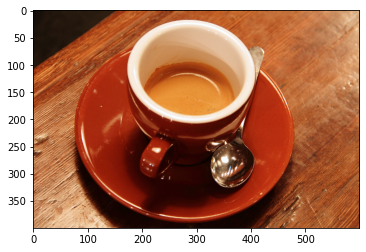

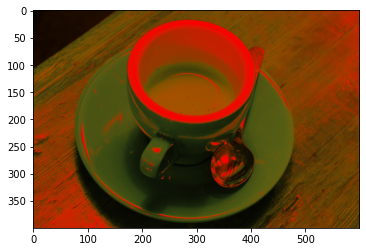

In [8]:
img1=imageio.imread('imageio:coffee.png')/255
print('Datos de la imágen inicial')
print(img1.shape)
print(img1.dtype)
plt.figure(0)
plt.imshow(img1)

img2=rgb_yiq(img1)
print('Datos de la imágen en YIQ')
print(img2[:,:,0].min())
print(img2[:,:,0].max())
plt.figure(1)
plt.imshow(img2)

Dibujamos el histograma de la imagen seleccionada.

Datos del histograma de la luminancia en YIQ
0.0011840324763193505
1.0


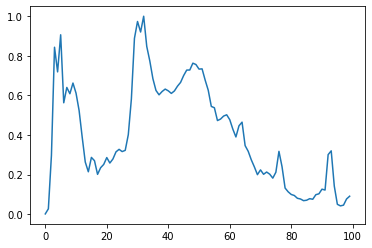

In [9]:
img3=hist(img2)
print('Datos del histograma de la luminancia en YIQ')
print(img3.min())
print(img3.max())
plt.figure(2)
plt.plot(img3)

Corrección de imágenes oscuras.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Corrección de la imagen oscura:
0.021143765594836977
0.9999999999999999


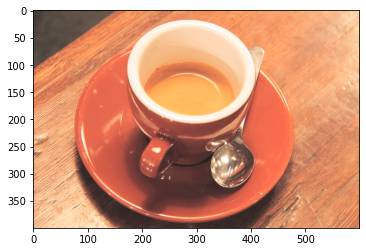

In [10]:
print('Corrección de la imagen oscura:')
yiq_mod1=rzcuad(img2)
print(yiq_mod1[:,:,0].min())
print(yiq_mod1[:,:,0].max())
img4=yiq_rgb(yiq_mod1)
plt.figure(3)
plt.imshow(img4)

Corrección de imágenes claras.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Corrección de la imagen clara:
1.9986159169550174e-07
0.9999999999999998


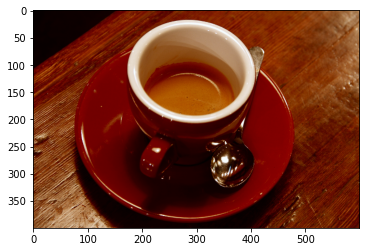

In [11]:
print('Corrección de la imagen clara:')
yiq_mod2=cuad(img2)
print(yiq_mod2[:,:,0].min())
print(yiq_mod2[:,:,0].max())
img5=yiq_rgb(yiq_mod2)
plt.figure(4)
plt.imshow(img5)

Corrección de imágenes de histogramas apretados.

Corrección de la imagen con luminancia comprimida:
El minimo es 0.0004470588235294118
El maximo es 0.9999999999999999


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0
1.0


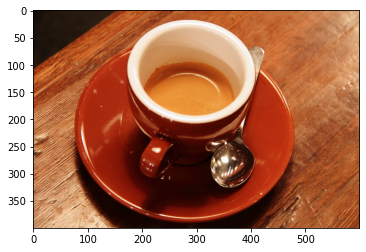

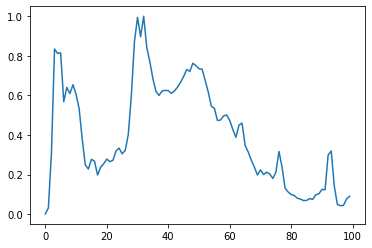

In [12]:
print('Corrección de la imagen con luminancia comprimida:')
yiq_mod3=lineal_por_tramos(img2)
print(yiq_mod3[:,:,0].min())
print(yiq_mod3[:,:,0].max())
img6=yiq_rgb(yiq_mod3)
plt.figure(5)
plt.imshow(img6)
img7=hist(yiq_mod3)
plt.figure(6)
plt.plot(img7)